In [725]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Preparación de datos: División train/test


Realizamos la separación para obtener los dos subconjuntos: train y test, así como nos quedamos con las columnas que nos parecen relevantes. 

In [726]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./data/airbnb-listings-extract.csv", sep=";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/airbnb-listings-extract_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb-listings-extract_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data = pd.read_csv('./data/airbnb-listings-extract_train.csv', sep=';', decimal='.')
columnas_a_conservar = [
    "Latitude",
    "Longitude",
    "Property Type",
    "Room Type",
    "Accommodates",
    "Bathrooms",
    "Bedrooms",
    "Beds",
    "Price",
    "Bed Type",
    "Security Deposit",
    "Cleaning Fee",
    "Guests Included",
    "Extra People",
    "Minimum Nights",
    "Maximum Nights",
    "Number of Reviews",
    "Review Scores Accuracy",
    "Review Scores Cleanliness",
    "Review Scores Checkin",
    "Review Scores Communication",
    "Review Scores Location",
    "Review Scores Value",
    "Cancellation Policy"
]
house_data = house_data[columnas_a_conservar]
house_data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Shared room,Private room,Private room
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Price,60.0,50.0,10.0,30.0,32.0
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed


## 2. Análisis exploratorio

Podemos analizar la estructura básica del dataset con las funciones de Pandas que ya conocemos: `describe`, `dtypes`, `shape`, etc.

In [727]:
house_data.describe()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,11809.000000,5052.000000,6974.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000
mean,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,73.712592,189.312154,32.073129,1.581614,7.637601,3.109946,961.732070,22.664834,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345
std,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,71.624844,116.011858,31.278032,1.160518,12.373491,13.427477,9387.640642,38.092338,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131
min,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,34.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,55.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,87.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,27.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,969.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,356.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [728]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     11824 non-null  float64
 1   Longitude                    11824 non-null  float64
 2   Property Type                11824 non-null  object 
 3   Room Type                    11824 non-null  object 
 4   Accommodates                 11824 non-null  int64  
 5   Bathrooms                    11780 non-null  float64
 6   Bedrooms                     11804 non-null  float64
 7   Beds                         11787 non-null  float64
 8   Price                        11809 non-null  float64
 9   Bed Type                     11824 non-null  object 
 10  Security Deposit             5052 non-null   float64
 11  Cleaning Fee                 6974 non-null   float64
 12  Guests Included              11824 non-null  int64  
 13  Extra People    

In [729]:
house_data.isnull().any()

Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Accommodates                   False
Bathrooms                       True
Bedrooms                        True
Beds                            True
Price                           True
Bed Type                       False
Security Deposit                True
Cleaning Fee                    True
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Number of Reviews              False
Review Scores Accuracy          True
Review Scores Cleanliness       True
Review Scores Checkin           True
Review Scores Communication     True
Review Scores Location          True
Review Scores Value             True
Cancellation Policy            False
dtype: bool

In [730]:
import pandas as pd

# Eliminar columnas con más del 90% de valores nulos
missing_values_train = house_data.isnull().sum()
missing_percentage_train = (missing_values_train / len(house_data)) * 100

# Seleccionamos las columnas que tienen más del 90% de valores nulos
cols_to_remove = missing_percentage_train[missing_percentage_train > 90].index.tolist()

# Eliminamos esas columnas
house_data = house_data.drop(columns=cols_to_remove).copy()  # Usamos .copy() para evitar problemas de referencia

# Identificar columnas numéricas y categóricas con valores nulos
num_cols_with_na = house_data.select_dtypes(include=["number"]).columns[
    house_data.select_dtypes(include=["number"]).isnull().any()
]
cat_cols_with_na = house_data.select_dtypes(include=["object"]).columns[
    house_data.select_dtypes(include=["object"]).isnull().any()
]

# Imputar valores nulos
# ➡️ Para columnas numéricas, usamos la MEDIANA
for col in num_cols_with_na:
    house_data.loc[:, col] = house_data[col].fillna(house_data[col].median())

# ➡️ Para columnas categóricas, usamos la MODA
for col in cat_cols_with_na:
    house_data.loc[:, col] = house_data[col].fillna(house_data[col].mode()[0])

# Verificar si quedan valores nulos
missing_after_imputation = house_data.isnull().sum().sum()
print(f"Valores nulos restantes: {missing_after_imputation}")

Valores nulos restantes: 0


In [731]:
house_data.isnull().any()

Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Accommodates                   False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Price                          False
Bed Type                       False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
Cancellation Policy            False
dtype: bool

In [732]:


# Identificar columnas categóricas en el dataset
cat_cols = house_data.select_dtypes(include=["object"]).columns

# Contar cuántas categorías únicas tiene cada variable categórica
unique_values_per_cat = house_data[cat_cols].nunique().sort_values(ascending=False)

# Definir umbral para decidir qué método usar
threshold = 10

# Separar variables categóricas según la cantidad de categorías únicas
one_hot_vars = unique_values_per_cat[unique_values_per_cat <= threshold].index.tolist()
target_enc_vars = unique_values_per_cat[unique_values_per_cat > threshold].index.tolist()

# Eliminar columnas irrelevantes (URLs, nombres únicos, etc.)
cols_to_drop = ["Listing Url", "Geolocation", "Picture Url", "Name", "Description"]
target_enc_vars = [col for col in target_enc_vars if col not in cols_to_drop]

# Aplicar One-Hot Encoding a variables con pocas categorías
house_data = pd.get_dummies(house_data, columns=one_hot_vars, drop_first=True)

# Aplicar Target Encoding manualmente
# Primero, calcular la media del precio para cada categoría en las variables seleccionadas
target_enc_dict = {
    col: house_data.groupby(col)["Price"].mean() for col in target_enc_vars
}

# Luego, reemplazar las categorías por su media correspondiente
for col in target_enc_vars:
    house_data[col] = house_data[col].map(target_enc_dict[col])

# Eliminar columnas irrelevantes
house_data = house_data.drop(columns=cols_to_drop, errors="ignore")

# Verificar la estructura final del dataset
print(f"Dimensiones del dataset después de la transformación: {house_data.shape}")
house_data.head()

Dimensiones del dataset después de la transformación: (11824, 34)


,Latitude,Longitude,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,...,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Room Type_Private room,Room Type_Shared room
0,40.407732,-3.684819,72.276412,4,1.0,1.0,2.0,60.0,150.0,25.0,...,False,False,False,False,False,False,False,True,False,False
1,40.415802,-3.705340,72.276412,4,1.0,1.0,2.0,50.0,150.0,15.0,...,False,False,False,False,False,False,False,True,False,False
2,40.389048,-3.740374,72.276412,1,1.5,1.0,8.0,10.0,150.0,5.0,...,False,False,False,False,False,False,False,True,False,True
3,40.412814,-3.703052,72.276412,2,3.0,1.0,1.0,30.0,150.0,25.0,...,True,False,False,False,False,False,False,True,True,False
4,40.438631,-3.713716,72.276412,2,1.0,1.0,1.0,32.0,150.0,25.0,...,True,False,False,False,False,False,False,True,True,False


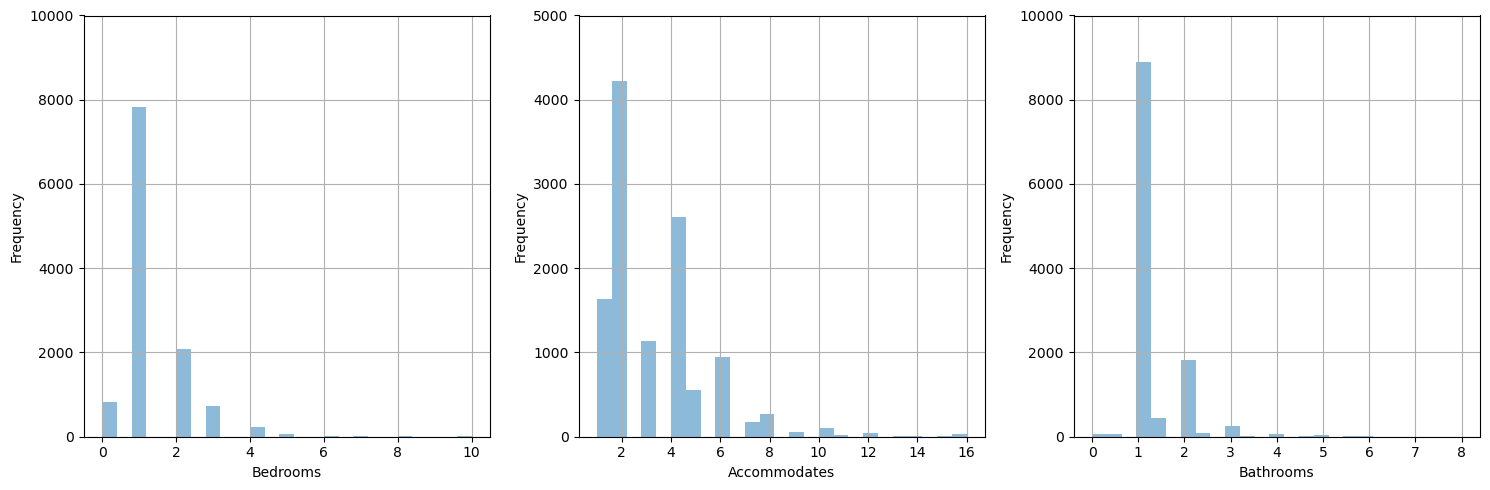

In [733]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
house_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10000)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
house_data['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 5000)
plt.xlabel('Accommodates')

plt.subplot(1,3,3)
house_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 10000)
plt.xlabel('Bathrooms')

plt.tight_layout()
plt.show()

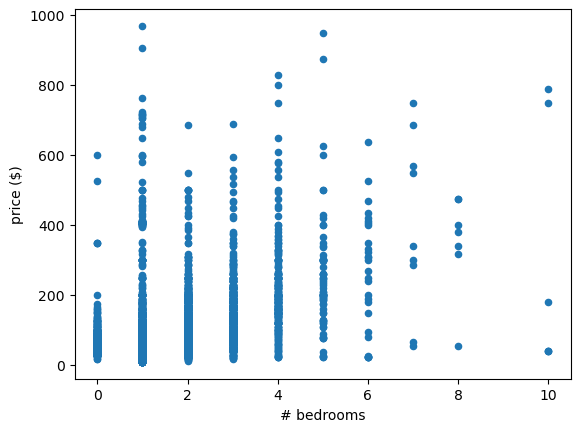

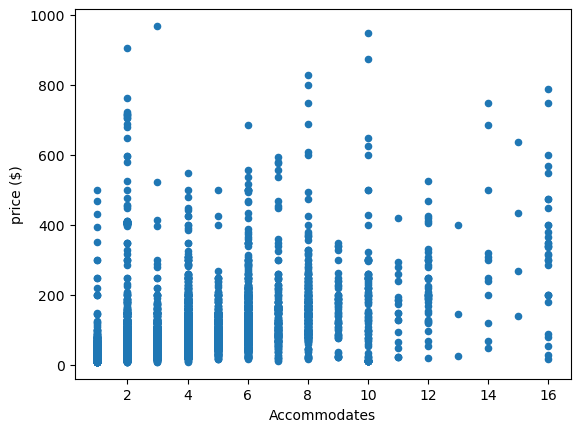

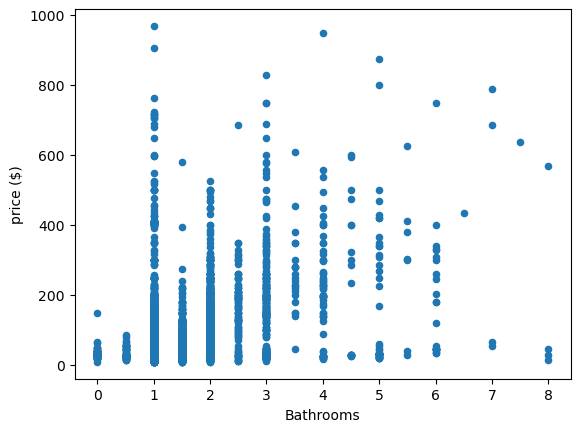

In [734]:
# Sólo representamos 3: Bedrooms, Acommodates y Bathrooms
# el resto se puede repetir una a una

house_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price ($)')
plt.show()

## Análisis de las Visualizaciones

Bedrooms vs. Price
		
*   Tendencia positiva: A medida que aumenta el número de dormitorios, el precio tiende a ser más alto. Esto es lógico, ya que propiedades más grandes suelen tener precios más elevados.
*   Presencia de outliers: Hay algunos valores de Price que son anormalmente altos para un número bajo de Bedrooms, lo que sugiere posibles outliers o propiedades de lujo con precios desproporcionados.

Review Accommodates vs. Price

* 	Relación esperada: A medida que una propiedad puede alojar a más personas, su precio generalmente sube.
*   Alta dispersión: No hay una línea clara que relacione Accommodates con Price, lo que indica que otros factores (ubicación, tipo de propiedad) influyen significativamente en el precio.
*   Algunos valores atípicos: Se observan alojamientos con capacidad alta pero precios sorprendentemente bajos o muy elevados.

Bathrooms vs. Price

*   Tendencia leve: Más baños suelen estar asociados con precios más altos, aunque no de forma tan fuerte como Bedrooms o Accommodates.
*   Distribución más uniforme: Aunque hay dispersión, la relación parece más estable en comparación con Accommodates.
*   Valores extremos: Existen algunas propiedades con muchos baños y precios anormalmente altos, que pueden ser propiedades de lujo o errores en los datos.

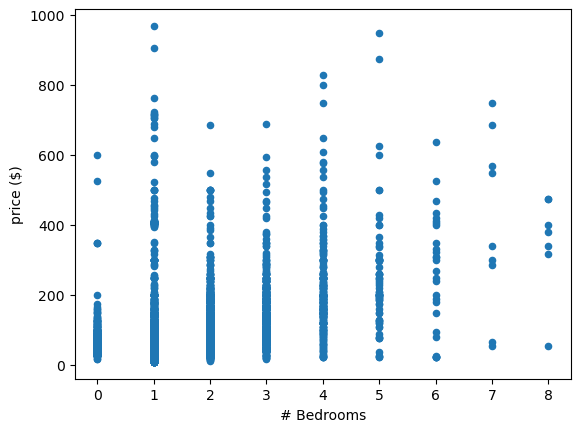

In [735]:
house_data_no_outliers_bedrooms = house_data[house_data['Bedrooms'] <= 8]

house_data_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price ($)')
plt.show()

In [736]:
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0])/house_data.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11818
Diferencia: 6
Variación: 0.050744%


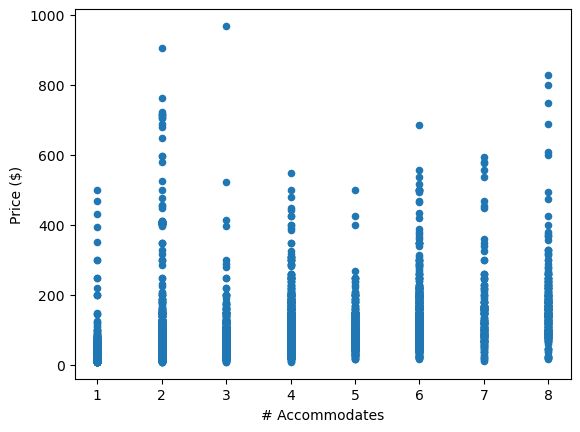

In [737]:

house_data_no_outliers_accommodates = house_data[house_data["Accommodates"] <= 8]

house_data_no_outliers_accommodates.plot(kind="scatter", x="Accommodates", y="Price")
plt.xlabel("# Accommodates")
plt.ylabel("Price ($)")
plt.show()

In [738]:
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_accommodates.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_accommodates.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_accommodates.shape[0])/house_data.shape[0])*100:.2f}%')

Original: 11824 // Modificado: 11555
Diferencia: 269
Variación: 2.28%


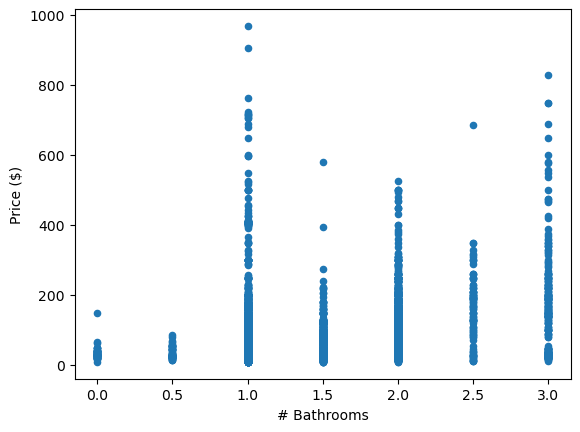

In [739]:
house_data_no_outliers_bathrooms = house_data[house_data["Bathrooms"] <= 3]

house_data_no_outliers_bathrooms.plot(kind="scatter", x="Bathrooms", y="Price")
plt.xlabel("# Bathrooms")
plt.ylabel("Price ($)")
plt.show()

In [740]:
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_bathrooms.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_bathrooms.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_bathrooms.shape[0])/house_data.shape[0])*100:.2f}%')

Original: 11824 // Modificado: 11629
Diferencia: 195
Variación: 1.65%


*    No hay valores extremos que necesiten eliminación.
*    La mejor estrategia es simplemente usar Bathrooms sin eliminar outliers.

In [741]:
house_data.corr()

,Latitude,Longitude,Property Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,...,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Room Type_Private room,Room Type_Shared room
Latitude,1.000000,-0.493585,-0.018349,0.006899,-0.006496,-0.010106,0.000535,-0.013509,0.016086,0.000320,...,0.004188,0.022676,0.006321,-0.006468,-0.005675,0.003207,0.010650,-0.009103,-0.001721,-0.082842
Longitude,-0.493585,1.000000,-0.008704,0.018478,0.027074,0.039558,0.034312,0.004841,-0.021774,-0.028925,...,-0.012682,0.058478,0.014232,0.016434,-0.053606,-0.004217,-0.003147,0.018225,-0.018341,0.042137
Property Type,-0.018349,-0.008704,1.000000,0.148006,0.172040,0.194837,0.161478,0.159804,0.030666,0.092244,...,0.014653,-0.000336,-0.004685,0.033768,-0.010713,-0.012171,-0.010292,0.016801,-0.049003,-0.061733
Accommodates,0.006899,0.018478,0.148006,1.000000,0.432064,0.722549,0.835969,0.526160,0.181756,0.303439,...,0.209881,0.001345,0.026951,0.034408,0.000301,-0.025652,-0.036800,0.043011,-0.531884,0.007660
Bathrooms,-0.006496,0.027074,0.172040,0.432064,1.000000,0.521187,0.475228,0.375175,0.154227,0.224776,...,0.171062,0.006270,0.014022,0.048645,-0.016248,-0.009784,-0.048422,0.051889,-0.026152,-0.001683
Bedrooms,-0.010106,0.039558,0.194837,0.722549,0.521187,1.000000,0.727094,0.489470,0.189540,0.304068,...,0.131695,0.006856,0.010258,0.043111,-0.016887,-0.019303,-0.073842,0.079226,-0.258909,-0.044788
Beds,0.000535,0.034312,0.161478,0.835969,0.475228,0.727094,1.000000,0.435364,0.156871,0.265001,...,0.160197,0.003662,0.002985,0.028780,-0.021802,-0.025346,-0.051602,0.062270,-0.351201,0.100573
Price,-0.013509,0.004841,0.159804,0.526160,0.375175,0.489470,0.435364,1.000000,0.243133,0.449697,...,0.147536,0.021263,0.011765,0.064120,0.003034,-0.023522,-0.028777,0.034262,-0.357185,-0.069762
Security Deposit,0.016086,-0.021774,0.030666,0.181756,0.154227,0.189540,0.156871,0.243133,1.000000,0.281662,...,0.137049,-0.011896,0.024649,0.027723,-0.003865,-0.013976,-0.000645,0.007111,-0.154872,-0.027224
Cleaning Fee,0.000320,-0.028925,0.092244,0.303439,0.224776,0.304068,0.265001,0.449697,0.281662,1.000000,...,0.183895,0.014258,0.029804,0.049774,-0.011397,-0.011650,-0.019477,0.025271,-0.253124,-0.034378


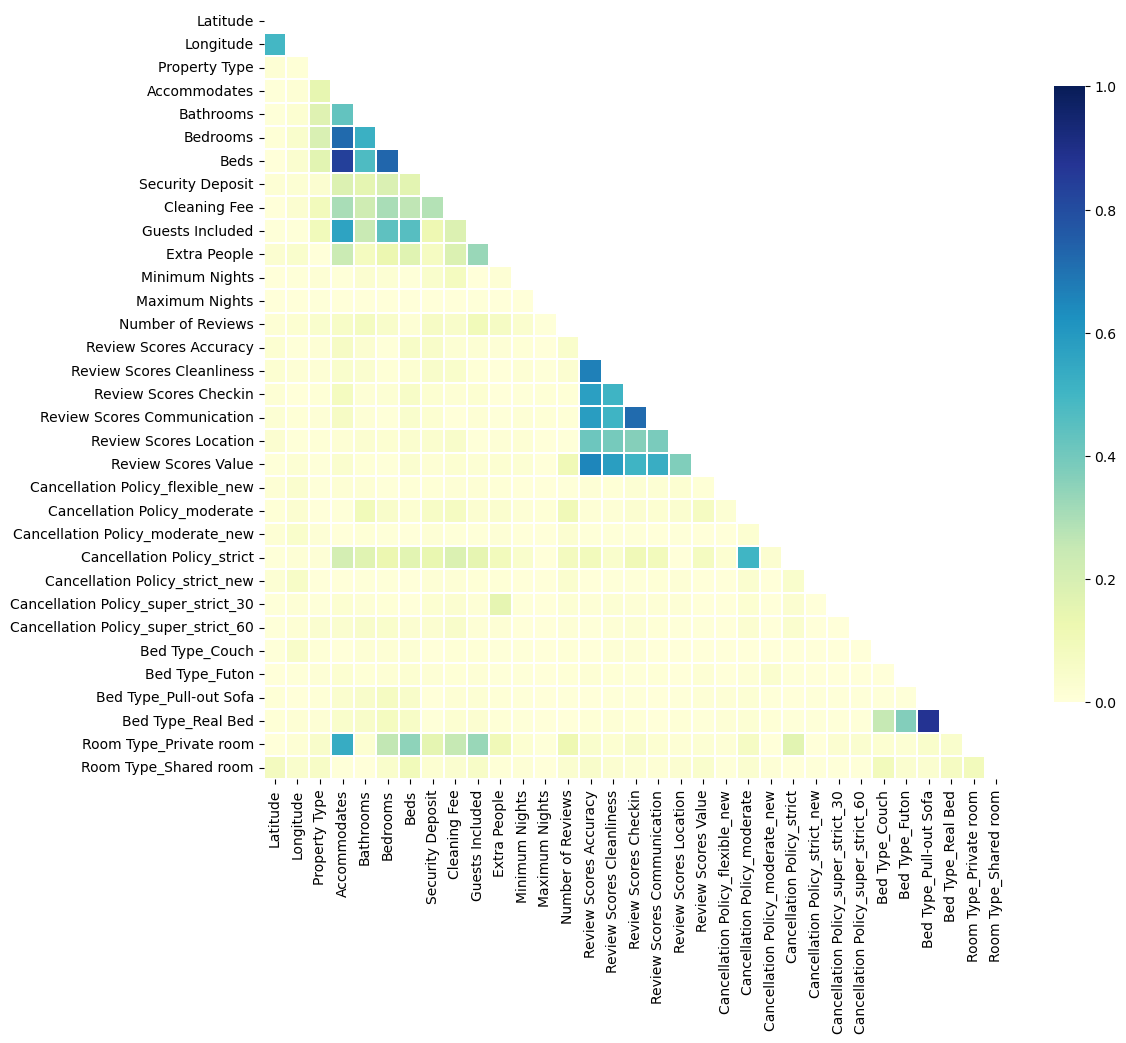

In [742]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

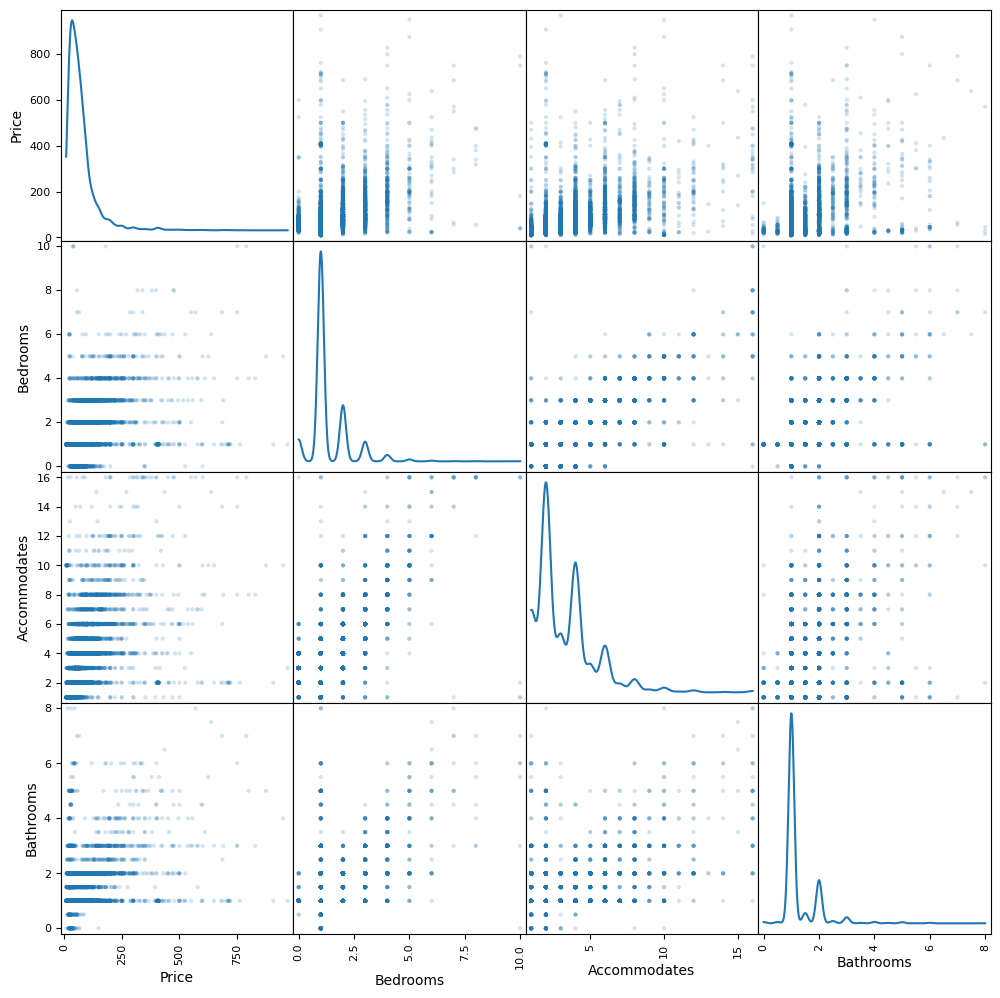

In [743]:

# Seleccionar solo las variables numéricas relevantes
num_vars = ["Price", "Bedrooms", "Accommodates", "Bathrooms"]

# Filtrar el dataset con solo esas columnas
house_data = house_data[num_vars]

# Generar la matriz de gráficos de dispersión
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(12, 12), diagonal='kde')

# Mostrar la visualización
plt.show()

## 3. Preprocesamiento

In [744]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data.values

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = house_data.columns[1:]

In [745]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (8868, 3)
Datos test:  (2956, 3)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.66

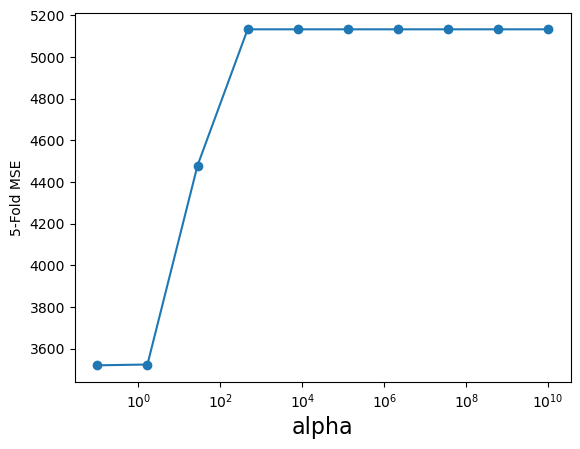

In [746]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,10) # Podéis subir esto a 50, yo lo dejo en 20 para que tarde menos
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [747]:
# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data.values

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = house_data.columns[1:]

In [748]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.51e+03
MSE Modelo Lasso (test) : 3.49e+03
RMSE Modelo Lasso (train): 59.3
RMSE Modelo Lasso (test) : 59
Bedrooms 11.582878269860652
Accommodates 24.994641002206958
Bathrooms 9.706681931534016


Según Lasso las variables más relevantes son Accommodates, Bedrooms, Bathrooms, por lo que nos quedamos con esas variables. 

## 4. Modelado, cross-validation y estudio de resultados en train y test

In [749]:
# Carga de datos
house_data = pd.read_csv('./data/airbnb-listings-extract_train.csv', sep=';', decimal='.')

# Imputación
columnas_a_conservar = [
    "Accommodates", "Bedrooms", "Bathrooms", "Price"
]
house_data = house_data[columnas_a_conservar]

# Eliminamos outliers en bedrooms
house_data = house_data[house_data['Bedrooms'] <= 8]
house_data = house_data[house_data['Accommodates'] <= 8]


In [750]:
# Carga de datos
house_data_test = pd.read_csv('./data/airbnb-listings-extract_test.csv', sep=';', decimal='.')

# Imputación

columnas_a_conservar = [
    "Accommodates", "Bedrooms", "Bathrooms", "Price"
]

# Eliminamos outliers en bedrooms
house_data_test = house_data_test[house_data_test['Bedrooms'] <= 8]
house_data_test = house_data_test[house_data_test['Accommodates'] <= 8]

In [751]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

In [752]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo (Price) y las características (X)
X = house_data.drop(columns=["Price"])  # Asegurar que 'Price' es la variable objetivo
y = house_data["Price"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmar dimensiones
print(f"✅ X_train: {X_train.shape}, X_test: {X_test.shape}")

✅ X_train: (9225, 3), X_test: (2307, 3)


In [753]:
# Mantener solo columnas numéricas en X_train y X_test
X_train = X_train.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

# Verificar que ahora solo haya números
print(X_train.dtypes)

Accommodates      int64
Bedrooms        float64
Bathrooms       float64
dtype: object


In [754]:
# Asegurar que todas las variables categóricas han sido convertidas
house_data = pd.get_dummies(house_data, drop_first=True)

# Verificar que no haya valores NaN después de la transformación
print("🔍 Valores NaN en house_data:", house_data.isnull().sum().sum())

# Asegurar que todas las columnas son numéricas
print("📊 Tipos de datos después de One-Hot Encoding:")
print(house_data.dtypes.unique())  # Debe devolver solo float64 e int64

🔍 Valores NaN en house_data: 56
📊 Tipos de datos después de One-Hot Encoding:
[dtype('int64') dtype('float64')]


In [755]:
# Rellenar valores NaN en variables numéricas con la mediana
house_data.fillna(house_data.median(numeric_only=True), inplace=True)

# Rellenar valores NaN en variables booleanas con False (0)
house_data.fillna(False, inplace=True)

# Confirmar que ya no hay NaN
print("✅ Valores NaN después del reemplazo:", house_data.isnull().sum().sum())

✅ Valores NaN después del reemplazo: 0


In [756]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Separar X (variables predictoras) e y (variable objetivo)
X = house_data.drop(columns=["Price"])  # Eliminar la variable objetivo
y = house_data["Price"]  # Definir la variable objetivo

# 2️⃣ Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Aplicar StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar en train
X_test_scaled = scaler.transform(X_test)  # Usar el mismo scaler en test

# Confirmar que la normalización fue exitosa
print("✅ Normalización completada. Tamaño de los datos:")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")

✅ Normalización completada. Tamaño de los datos:
X_train_scaled: (9225, 3), X_test_scaled: (2307, 3)


In [757]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

LinearRegression()

In [758]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train_scaled, y_train)

# Generar predicciones con los datos de prueba
y_pred = modelo.predict(X_test_scaled)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = modelo.score(X_test_scaled, y_test)

# Mostrar resultados
print("📊 Evaluación del Modelo de Regresión Lineal:")
print(f"✅ MAE (Error Absoluto Medio): {mae:.2f}")
print(f"✅ MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

📊 Evaluación del Modelo de Regresión Lineal:
✅ MAE (Error Absoluto Medio): 29.61
✅ MSE (Error Cuadrático Medio): 3030.93
✅ R² Score: 0.29


In [759]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1️⃣ Crear los modelos con un parámetro alpha estándar (se puede ajustar)
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

# 2️⃣ Entrenar los modelos
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# 3️⃣ Generar predicciones
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# 4️⃣ Evaluar los modelos
def evaluar_modelo(nombre, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = ridge_model.score(X_test_scaled, y_test)
    
    print(f"📊 Evaluación de {nombre}:")
    print(f"✅ MAE (Error Absoluto Medio): {mae:.2f}")
    print(f"✅ MSE (Error Cuadrático Medio): {mse:.2f}")
    print(f"✅ R² Score: {r2:.2f}")
    print("-" * 40)

evaluar_modelo("Regresión Ridge", y_test, y_pred_ridge)
evaluar_modelo("Regresión Lasso", y_test, y_pred_lasso)

📊 Evaluación de Regresión Ridge:
✅ MAE (Error Absoluto Medio): 29.61
✅ MSE (Error Cuadrático Medio): 3030.93
✅ R² Score: 0.29
----------------------------------------
📊 Evaluación de Regresión Lasso:
✅ MAE (Error Absoluto Medio): 29.65
✅ MSE (Error Cuadrático Medio): 3038.90
✅ R² Score: 0.29
----------------------------------------


In [760]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1️⃣ Crear el modelo Random Forest con hiperparámetros iniciales
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2️⃣ Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train_scaled, y_train)

# 3️⃣ Generar predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# 4️⃣ Evaluar el modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = rf_model.score(X_test_scaled, y_test)

# 5️⃣ Mostrar resultados
print("📊 Evaluación de Random Forest Regressor:")
print(f"✅ MAE (Error Absoluto Medio): {mae_rf:.2f}")
print(f"✅ MSE (Error Cuadrático Medio): {mse_rf:.2f}")
print(f"✅ R² Score: {r2_rf:.2f}")

📊 Evaluación de Random Forest Regressor:
✅ MAE (Error Absoluto Medio): 27.51
✅ MSE (Error Cuadrático Medio): 2771.77
✅ R² Score: 0.35


## 5. Conclusión

Si bien todos los modelos evaluados muestran un rendimiento modesto, el modelo Random Forest Regressor parece ser el más prometedor para la predicción del precio de las propiedades de Airbnb. Sin embargo, hay margen de mejora y podría ser útil explorar más técnicas de ajuste de parámetros, modelos más complejos o la inclusión de nuevas características para mejorar el rendimiento.